In [2]:
import pandas as pd
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

🟨 Bar Plot of Top Skills for Cloud Engineers (2.11.1) - Problem
Pandas Explode
Problem Statement:

    Using the ast library, clean up the job_skills column to be of the list data type in preparation for exploding this column.
        NOTE: For future problems, it'll be assumed that you have done this step in preparation for exploding this column.
    Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
    Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.

Hint:

Filter out the DataFrame to only get Cloud Engineer jobs and use the explode() function on the job_skills column, then use value_counts(), and finally use plot() to create a bar plot.

<function matplotlib.pyplot.show(close=None, block=None)>

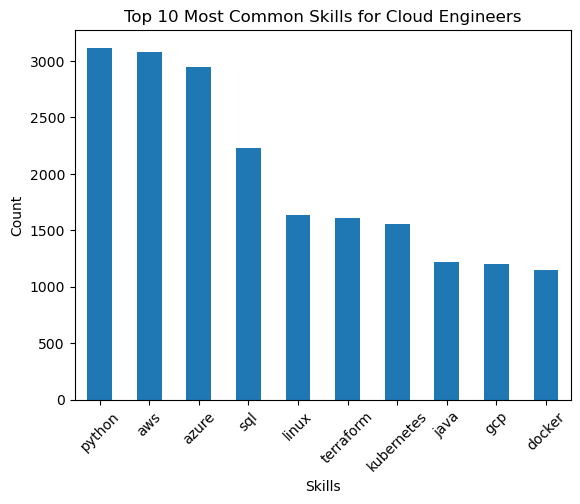

In [16]:
df_CE = df[df['job_title_short']=='Cloud Engineer'].explode('job_skills').value_counts('job_skills').head(10).copy()
df_CE.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.xticks(rotation=45)
plt.show

🟨 Average Salary by Skill (2.11.2) - Problem
Pandas Explode
Problem Statement:

Explode the job_skills column in the DataFrame and calculate the average salary for each skill. Display the top 5 skills with the highest average salary.
Hint:

Use the explode() function on the job_skills column.

In [38]:
df_exploded = df.explode('job_skills').copy()
df_exploded.groupby(by='job_skills',as_index=False)['salary_year_avg'].mean().sort_values(by='salary_year_avg',ascending=False).head()


,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526



🟥 Unique Skills Count (2.11.3) - Problem
Pandas Explode
Problem Statement:

Calculate the number of unique skills required for each job_title_short.

    Explode the job_skills column

    Group by job_title_short

    Count unique skills per title (i.e., num_unique_skills)

    Rename the result column to num_unique_skills and show the first 5 rows

Hint:

Use the explode() function on the job_skills column, then group by job_title_short and use nunique() to count the number of unique skills for each job posting.


In [3]:
df_explode = df.explode('job_skills')
df_explode.groupby('job_title_short',as_index=False)['job_skills'].nunique().rename(columns={'job_skills':'num_unique_skills'}).head()

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237
